In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("HTRU_2.csv",header= None)

In [25]:
x1= dataset.iloc[:,0:8].values

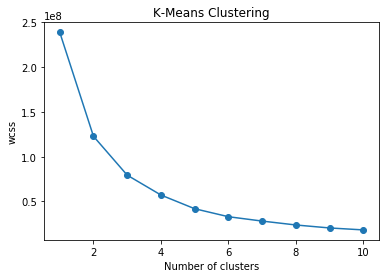

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.title('K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x1)

from sklearn.decomposition import PCA
pca = PCA(n_components =2)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_

In [60]:
explained_variance

array([0.51675584, 0.26807564])

In [57]:
kmeans = KMeans(n_clusters=10,n_init=100, max_iter=3000, tol=0.0001, precompute_distances='auto', verbose=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

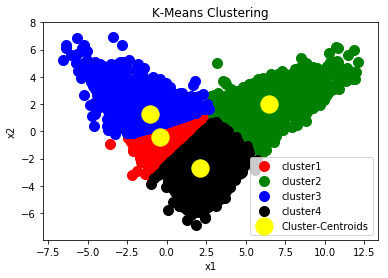

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="green",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="blue",label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c="black",label="cluster4")
# plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c="pink",label="cluster5")
# plt.scatter(x[y_kmeans==5,0],x[y_kmeans==5,1],s=100,c="purple",label="cluster6")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Cluster-Centroids")


plt.title('K-Means Clustering')
plt.xlabel('x1')
# plt.xlim(-5,25)
plt.ylabel('x2')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import davies_bouldin_score
z = davies_bouldin_score(x, y_kmeans)
z

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.102827226255306

In [ ]:
An index of 1.1 makes '4' as ideal number of clusters and clusters are clearly separable